<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5B

# House Price Prediction using Multiple Linear Regression

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

### Description:

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.  The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.  

### Instructions:
Choose the independent variables to creata a decent predictive model using multiple linear regression

## Import libraries 🐍

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## A. Understanding the Dataset

In [144]:
df = pd.read_csv("house_prices.csv")

In [145]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
437,3290000,5880,3,1,1,yes,no,no,no,no,1,no,unfurnished
397,3500000,5900,2,1,1,yes,no,no,no,no,1,no,furnished
43,7700000,6000,4,2,4,yes,no,no,no,no,2,no,semi-furnished
235,4620000,5680,3,1,2,yes,yes,no,no,yes,1,no,semi-furnished
272,4340000,4075,3,1,1,yes,yes,yes,no,no,2,no,semi-furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
311,4123000,6060,2,1,1,yes,no,yes,no,no,1,no,semi-furnished
140,5740000,5800,3,2,4,yes,no,no,no,yes,0,no,unfurnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
157,5495000,2817,4,2,2,no,yes,yes,no,no,1,no,furnished


In [146]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [147]:
df.shape # data shape

(545, 13)

In [148]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [149]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [150]:
df.duplicated().sum() # duplicate values check

np.int64(0)

## B. Data Visualization

1. Use a `.scatterplot()` to check the relationship between area and price

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


<Axes: xlabel='area', ylabel='price'>

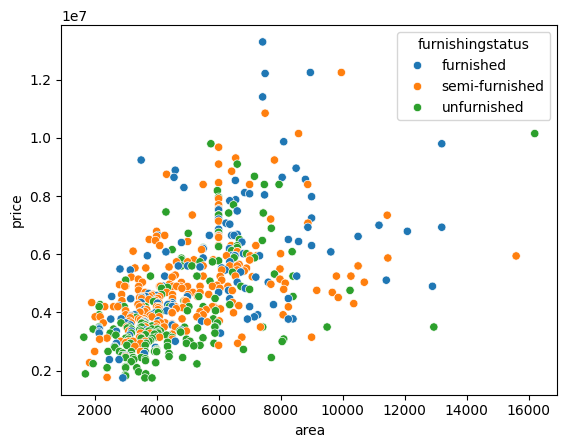

In [151]:
# Put your answer here
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])


2. Create a `.pairplot()` to check the relationships between the independent and dependent variables

In [ ]:
# Put your answer here
sns.pairplot(df,hue="furnishingstatus")


## C. Data pre-processing

3. Create a copy of the dataframe using `.copy()`

In [152]:
# Put your answer here
data=df.copy()


4. Apply the `get_dummies()` method to convert the categorical columns below into numbers/dummy variables.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [153]:
# Put your answer here
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
status

,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,False,False,True,False,False,False,True,True
1,False,False,True,False,False,False,True,False
2,True,False,True,False,True,False,False,True
3,False,False,True,False,True,False,True,True
4,False,False,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...
540,False,True,True,False,True,False,False,False
541,True,False,False,False,False,False,False,False
542,False,True,True,False,False,False,False,False
543,False,False,False,False,False,False,False,False


5. Concatenate the converted columns to the dataframe copy using `.concat()`

In [154]:
# Put your answer here
data = pd.concat([data, status], axis = 1)
data.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,False,False,True,True,True,False,True,False


6. Drop the categorical columns below using `.drop()`.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [155]:
# Put your answer here
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)


## D. Feature Selection

7. Use `.corr()` to check for multicollinearity between the features/independent variables

In [156]:
# Put your answer here
correlation = data.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.063656,-0.280587,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.006156,-0.142278,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.050040,-0.126252,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.029834,-0.132107,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.003648,-0.082972,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.041327,-0.165705,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627
furnishingstatus_semi-furnished,0.063656,0.006156,0.050040,0.029834,-0.003648,0.041327,1.000000,-0.588405,0.011450,0.005821,0.050284,0.063819,-0.053179,-0.011535
furnishingstatus_unfurnished,-0.280587,-0.142278,-0.126252,-0.132107,-0.082972,-0.165705,-0.588405,1.000000,-0.133123,-0.099023,-0.117935,-0.059194,-0.094086,-0.081271
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,0.011450,-0.133123,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.005821,-0.099023,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897


8. Create a heatmap using `.heatmap()` to visualize the correlation in a plot.

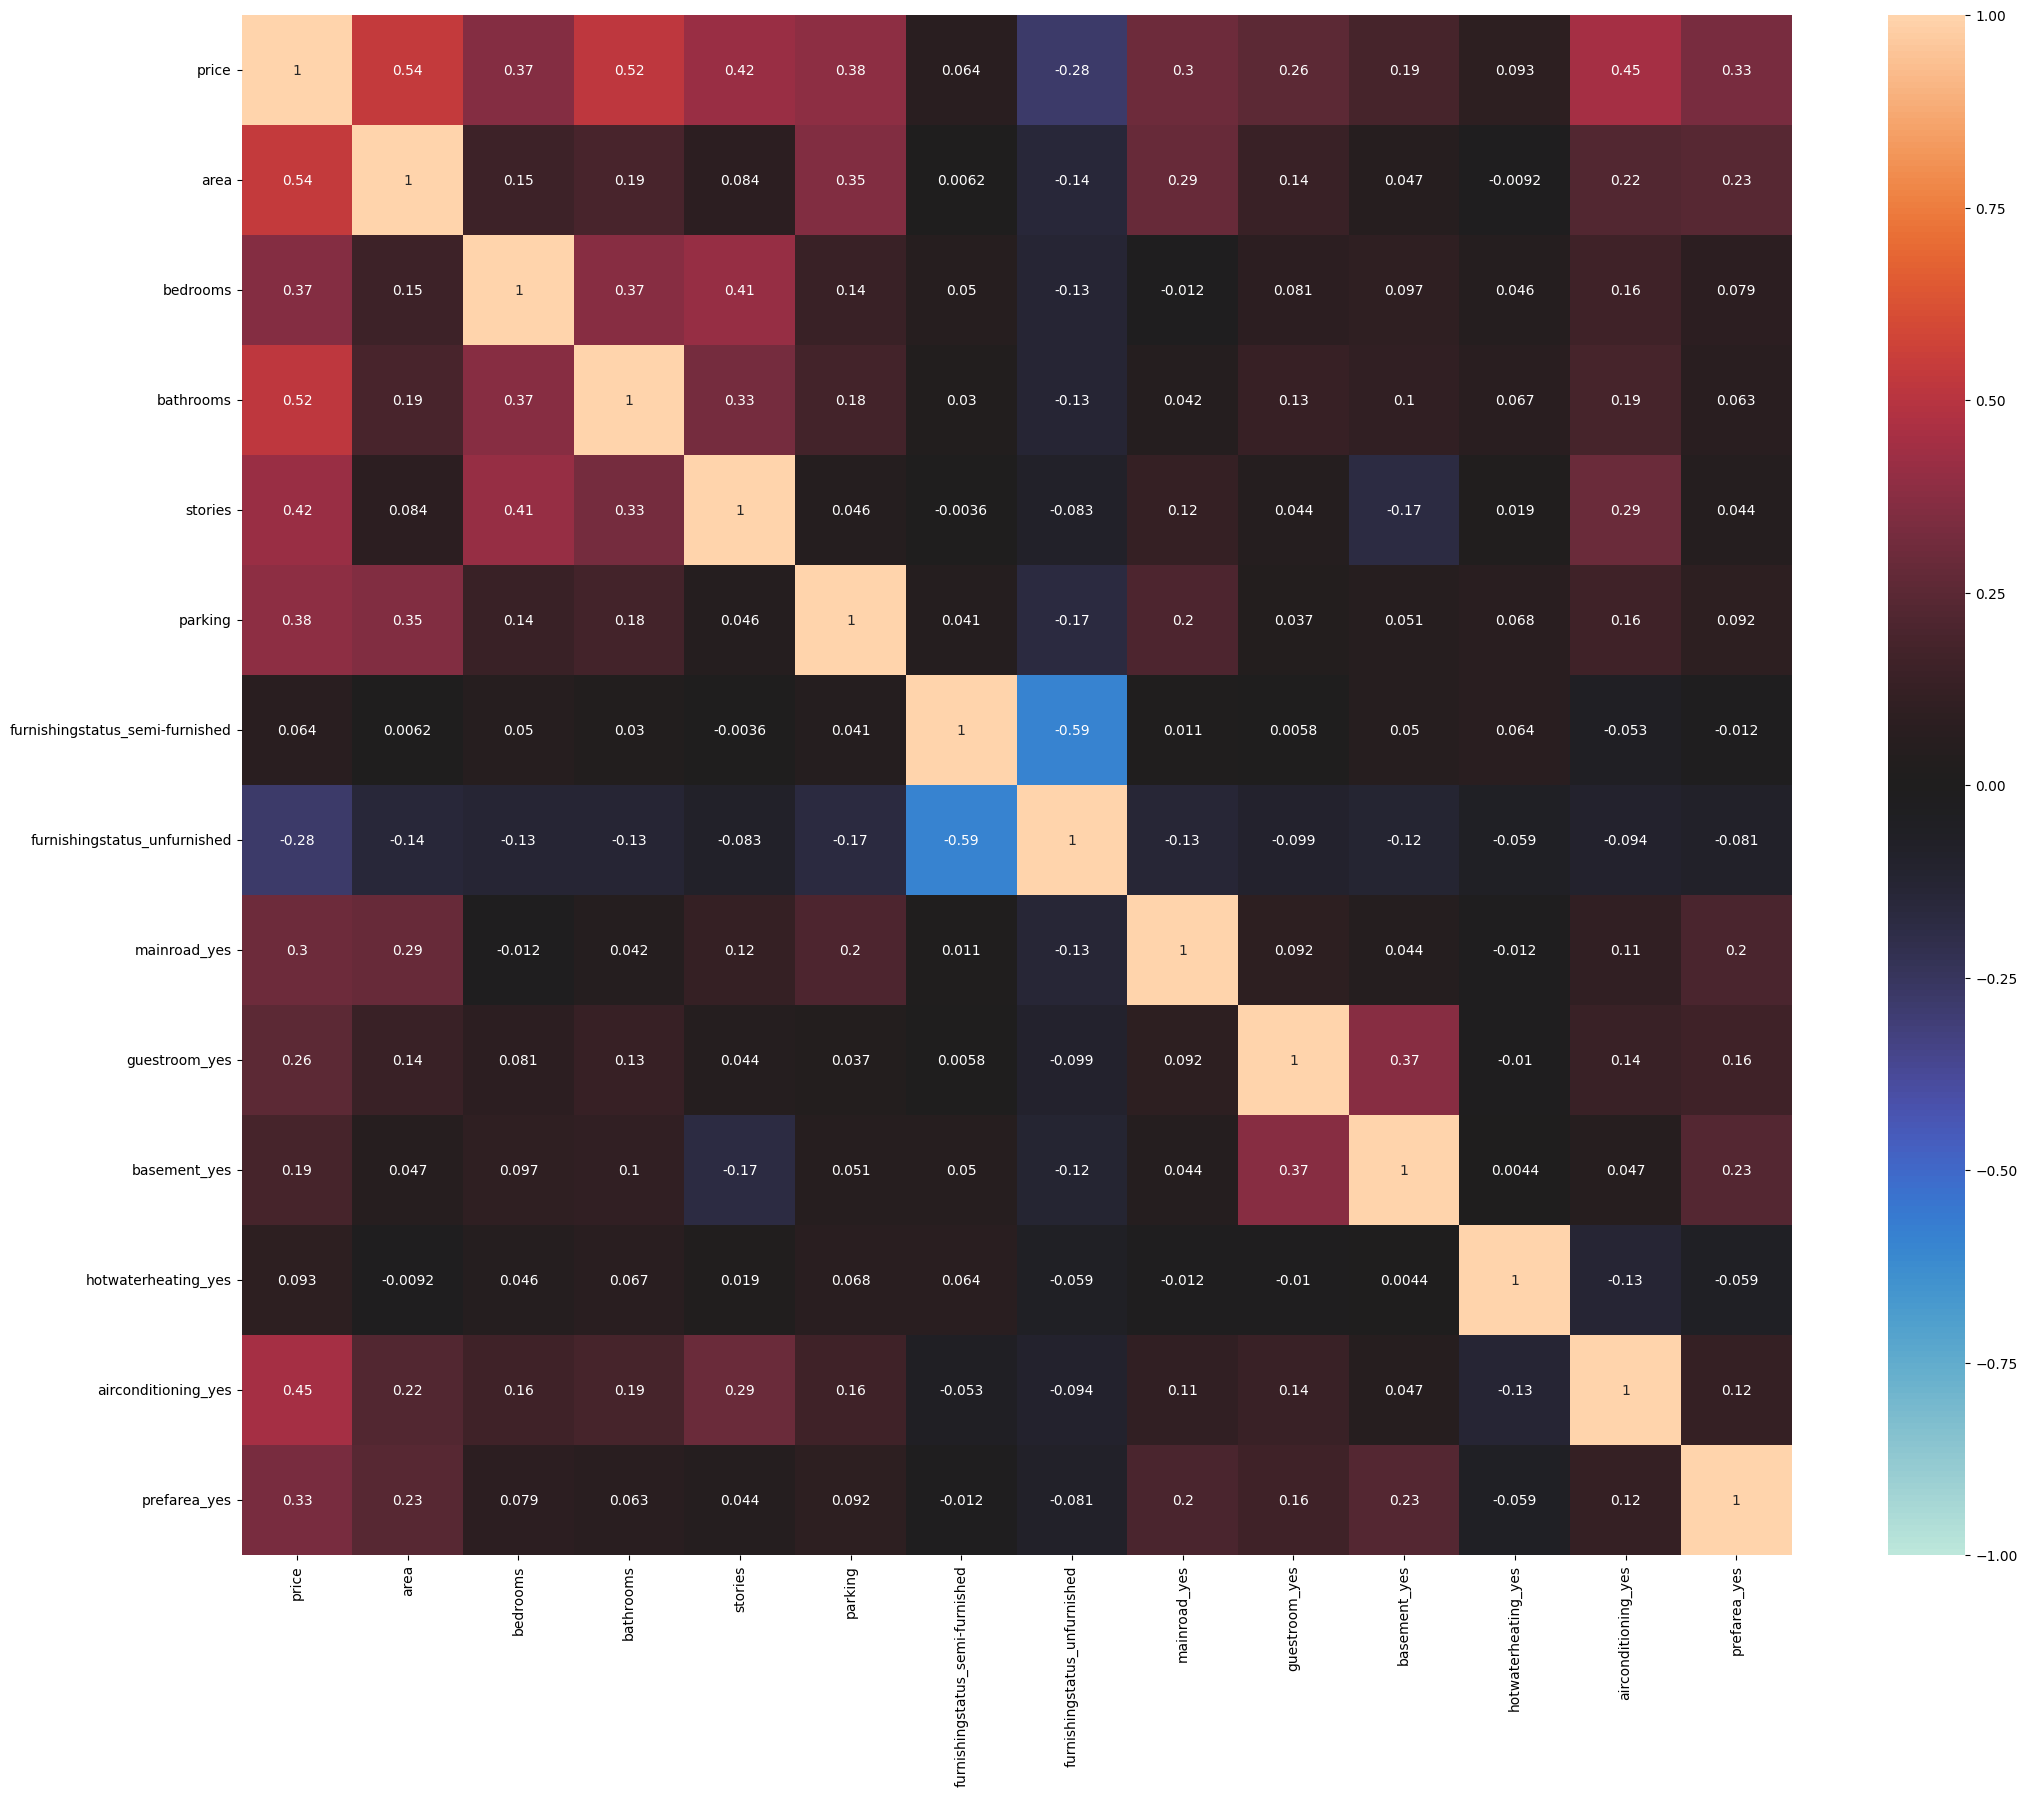

In [157]:
# Put your answer here
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

## E. Building the Model



9. Split the data set into a training and test set

In [183]:
# Put your answer here
X = data['bedrooms']
X = sm.add_constant(X)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

10. Use the the `MinMaxScaler()` method to apply scaling on the independent variables in the training and test set.

In [184]:
# Put your answer here
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

11. Create a new dataframe containing the unscaled features

In [185]:
# Put your answer here
unscaled_df = pd.DataFrame(X_train, columns=X.columns)
unscaled_df.head()

,const,bedrooms
126,1.0,3
363,1.0,2
370,1.0,2
31,1.0,3
113,1.0,3


12. Create a new dataframe containing the scaled features

In [186]:
# Put your answer here
scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df.head()

,const,bedrooms
0,0.0,0.4
1,0.0,0.2
2,0.0,0.2
3,0.0,0.4
4,0.0,0.4


13. Create a new instance of a Linear Regression model  

In [187]:
# Put your answer here
model = LinearRegression()


14. Use the `fit()` method to train your model using the training set.

In [188]:
# Put your answer here
model.fit(X_train_scaled, y_train)


LinearRegression()

15. Use the `predict()` method using the test set

In [189]:
# Put your answer here
y_pred = model.predict(X_test_scaled)
print('Intercept', model.intercept_)
print('Coefficient', model.coef_)


Intercept 3008065.0580204776
Coefficient [      0.         4479919.59044368]



16. Compute the $R^2$ of the model

In [190]:
# Put your answer here
olsmod = sm.OLS(y_test, X_test_scaled).fit()
olsmod.summary()

/home/ubuntu-rainn/miniconda3/envs/com222/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              788.0
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                    2.54e-64
Time:                        17:01:50   Log-Likelihood:                         -2624.5
No. Observations:                 164   AIC:                                      5251.
Df Residuals:                     163   BIC:                                      5254.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1          1.127e+07   4.02e+05     28.072      0.000    1.05e+07    1.21e+07
==============================================================================
Omnibus:                        7.698   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               13.880
Skew:                           0.090   Prob(JB):                     0.000968
Kurtosis:                       4.414   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [191]:
olsmod.rsquared

np.float64(0.8286098393923821)

In [308]:
X = data.drop(['hotwaterheating_yes', 'price'],
              axis=1)
X = sm.add_constant(X)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12353)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
unscaled_df = pd.DataFrame(X_train, columns=X.columns)
scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
olsmod = sm.OLS(y_test, X_test_scaled).fit()
qq = olsmod.rsquared
print(olsmod.summary())
    

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              374.5
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                   2.86e-106
Time:                        18:08:23   Log-Likelihood:                         -2477.8
No. Observations:                 164   AIC:                                      4980.
Df Residuals:                     152   BIC:                                      5017.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/ubuntu-rainn/miniconda3/envs/com222/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
